# CPSC 322: HW4
Name: **Tony Nguyen**

Term: Fall 2023

# 1. Load libraries and datasets

 Import the data table and utility functions.

In [1]:
from data_table import DataRow, DataTable
from data_util import *
import random

Load the cleaned auto data.

In [2]:
auto = DataTable(['mpg','cyls','disp','hp','weight','accl','year','origin','name','msrp'])
auto.load('auto-clean.txt')

Print the first 15 rows of the combined table.

In [3]:
auto.rows(range(15))

  mpg    cyls    disp    hp    weight    accl    year    origin  name                                msrp
-----  ------  ------  ----  --------  ------  ------  --------  --------------------------------  ------
 18         8     307   130      3504    12        70         1  chevrolet chevelle malibu           2881
 15         8     350   165      3693    11.5      70         1  buick skylark 320                   2847
 18         8     318   150      3436    11        70         1  plymouth satellite                  2831
 16         8     304   150      3433    12        70         1  amc rebel sst                       3166
 17         8     302   140      3449    10.5      70         1  ford torino                         2778
 15         8     429   198      4341    10        70         1  ford galaxie 500                    3137
 14         8     454   220      4354     9        70         1  chevrolet impala                    3132
 14         8     440   215      4312     8.5 

# 2. Data Visualization

## Histogram

Generate a series of equal-width histograms for: mpg, displacement, horsepower, weight, acceleration, and msrp. 

For each attribute, I draw one diagram with 10 bins, and another one with 18 bins. I choose 18 as it makes sense for a dataset of 314 instances, regarding the Square Root Rule.

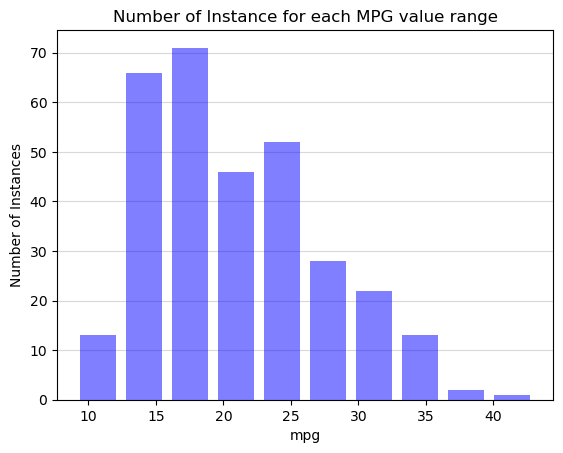

In [4]:
histogram(auto, 'mpg', 10, 'mpg', 'Number of Instances', 'Number of Instance for each MPG value range')

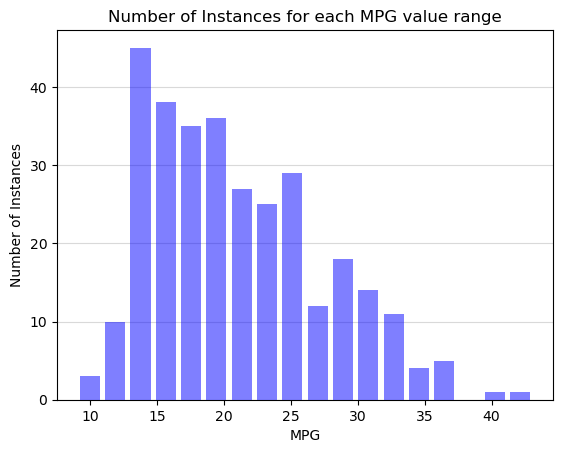

In [5]:
histogram(auto, 'mpg', 18, 'MPG', 'Number of Instances', 'Number of Instances for each MPG value range')

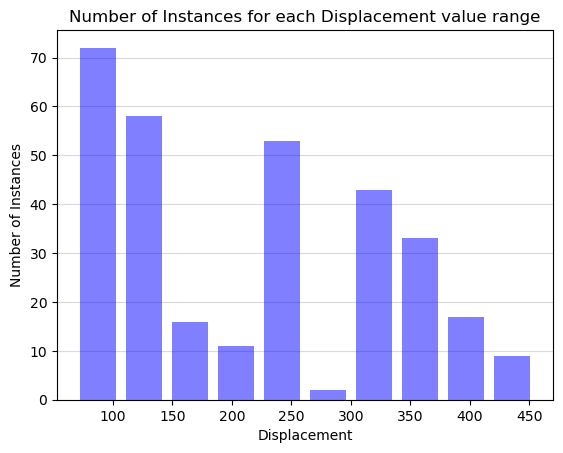

In [6]:
histogram(auto, 'disp', 10, 'Displacement', 'Number of Instances', 'Number of Instances for each Displacement value range')

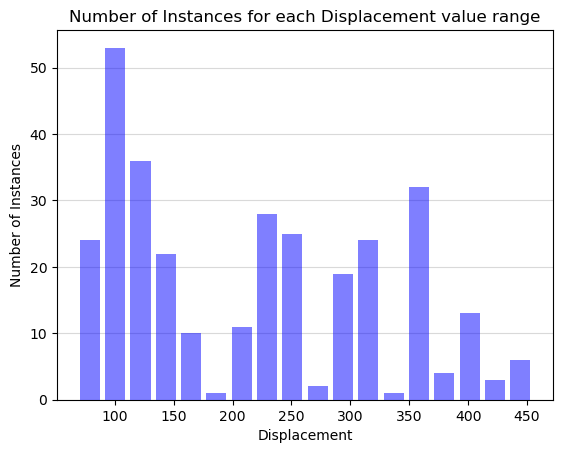

In [7]:
histogram(auto, 'disp', 18, 'Displacement', 'Number of Instances', 'Number of Instances for each Displacement value range')

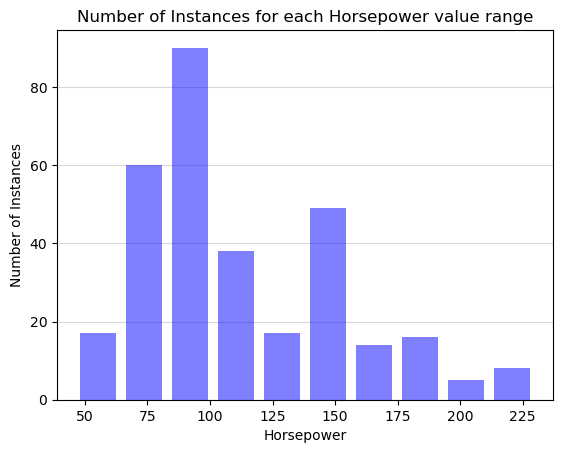

In [8]:
histogram(auto, 'hp', 10, 'Horsepower', 'Number of Instances', 'Number of Instances for each Horsepower value range')

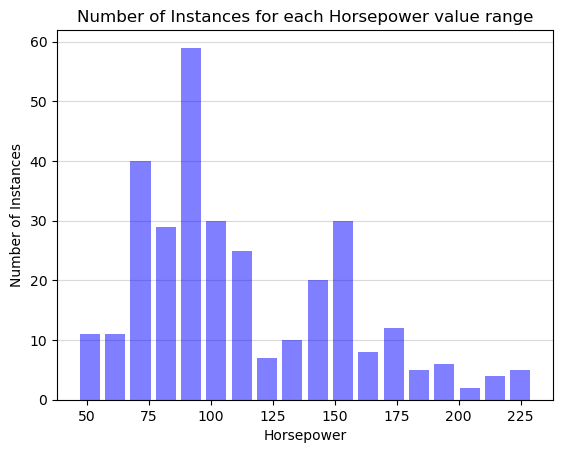

In [9]:
histogram(auto, 'hp', 18, 'Horsepower', 'Number of Instances', 'Number of Instances for each Horsepower value range')

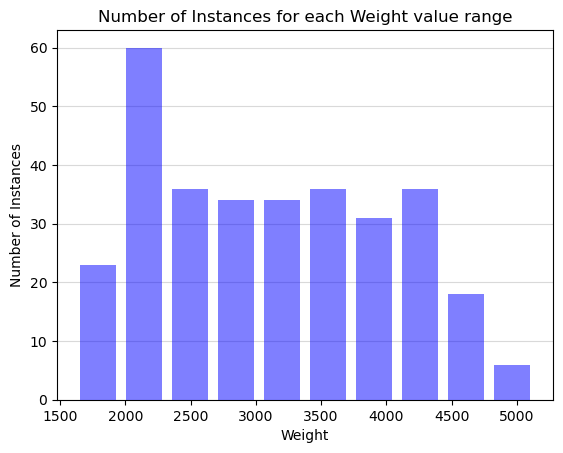

In [10]:
histogram(auto, 'weight', 10, 'Weight', 'Number of Instances', 'Number of Instances for each Weight value range')

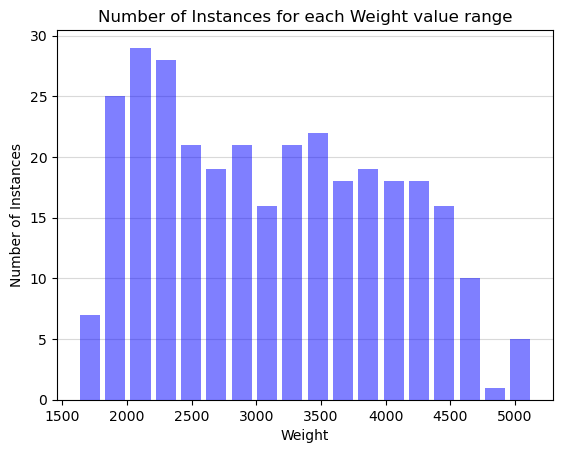

In [11]:
histogram(auto, 'weight', 18, 'Weight', 'Number of Instances', 'Number of Instances for each Weight value range')

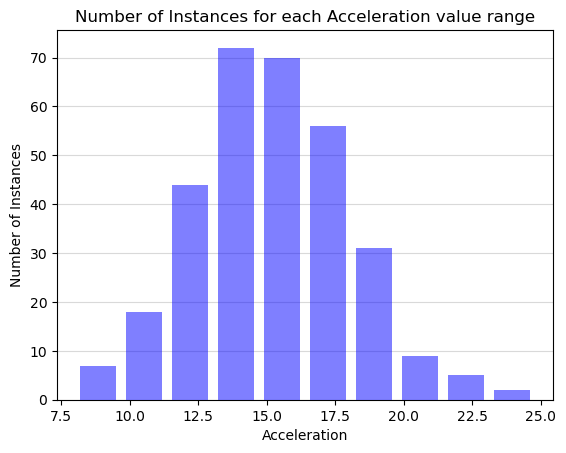

In [12]:
histogram(auto, 'accl', 10, 'Acceleration', 'Number of Instances', 'Number of Instances for each Acceleration value range')

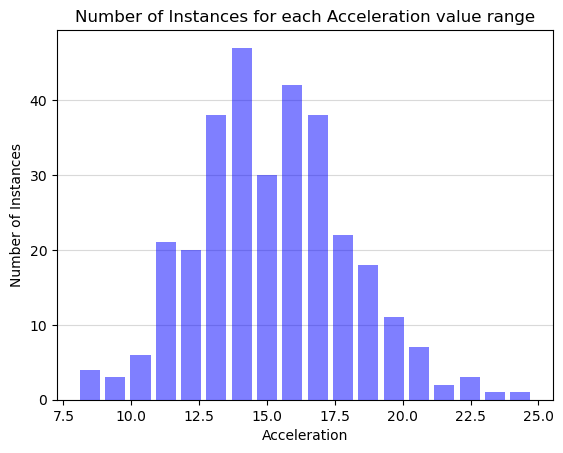

In [13]:
histogram(auto, 'accl', 18, 'Acceleration', 'Number of Instances', 'Number of Instances for each Acceleration value range')

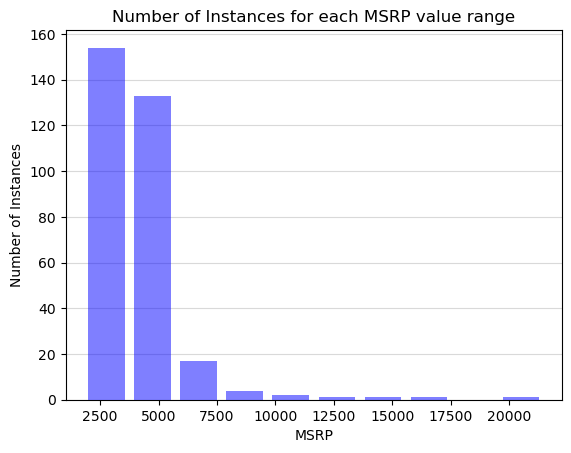

In [14]:
histogram(auto, 'msrp', 10, 'MSRP', 'Number of Instances', 'Number of Instances for each MSRP value range')

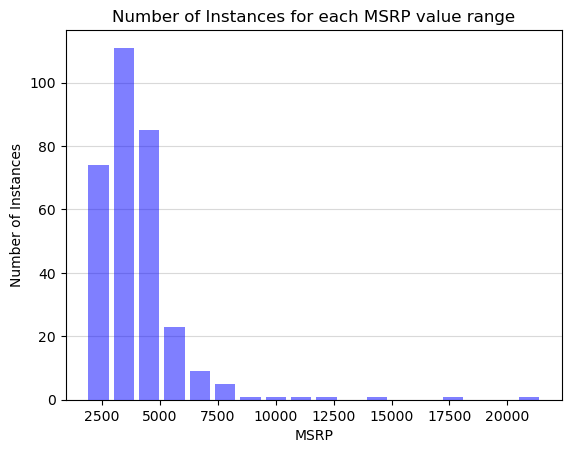

In [15]:
histogram(auto, 'msrp', 18, 'MSRP', 'Number of Instances', 'Number of Instances for each MSRP value range')

## Histograms with "Standard" Bins

### DOE Energy Rating

The rating on the DOE scale is shown as follow:


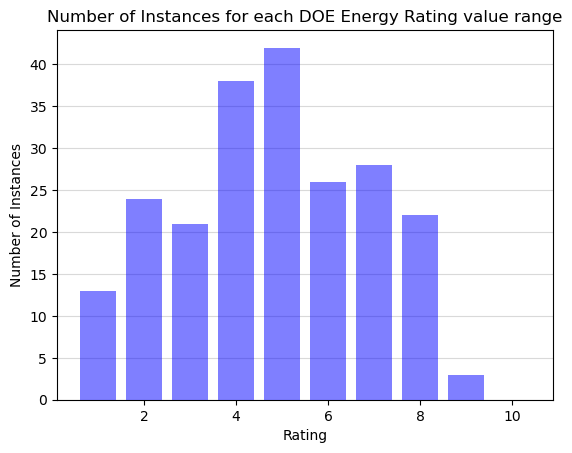

In [16]:
key = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cond = ['<=13', '14', '15-16', '17-19', '20-23', '24-26', '27-30', '31-36', '37-44', '>=45']

result = create_dict_of_ranges(auto, 'mpg', key, cond)
value = result.values()

bar_chart(value, key, 'Rating', 'Number of Instances', 'Number of Instances for each DOE Energy Rating value range')

### Horsepower Rating

A car that has a larger capacity engine typically yields a higher horsepower rate. With that, I am interested to to see the distribution of each clustered horsepower rating.

Recall the Horsepower distribution above, we have the following statistics:

In [17]:
mean(auto, 'hp')

111.8407643312102

In [18]:
summary_stat(auto, 'hp', mode)

150.0

In [19]:
summary_stat(auto, 'hp', median)

100.0

In [20]:
summary_stat(auto, 'hp', min)

46.0

In [21]:
summary_stat(auto, 'hp', max)

230.0

In [22]:
summary_stat(auto, 'hp', stdev)

40.27303464057582

From there, I divide them into 10 clustered bins.

|Rating|MPG|
|------|---|
|10|>=226|
|9|201-225|
|8|171-200|
|7|152-170|
|6|150-151|
|5|121-149|
|4|101-120|
|3|86-100|
|2|71-85|
|1|<=70|

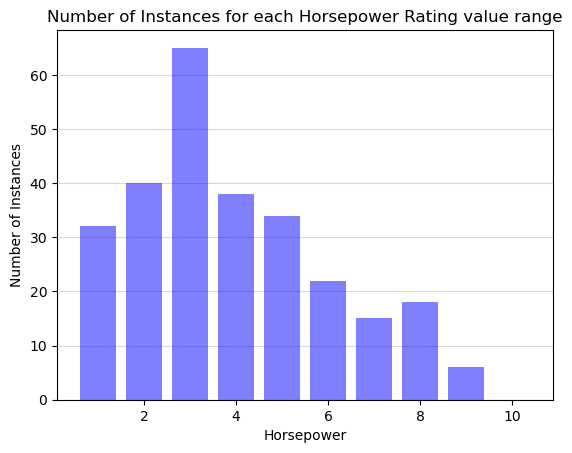

In [23]:
key = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
cond = ['<=70', '71-85', '86-100', '101-120', '121-149', '150-151', '152-170', '171-200', '201-225', '>=226']

result = create_dict_of_ranges(auto, 'hp', key, cond)
value = result.values()

bar_chart(value, key, 'Horsepower', 'Number of Instances', 'Number of Instances for each Horsepower Rating value range')

## Scatter Plots with Best Fit Lines

### MSRP v. MPG

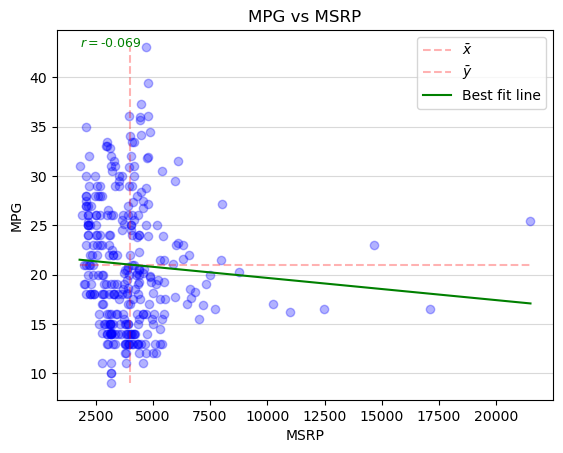

In [24]:
scatter_plot_with_best_fit(auto, 'msrp', 'mpg', 'MSRP', 'MPG', 'MPG vs MSRP')

### Displacement v. MPG

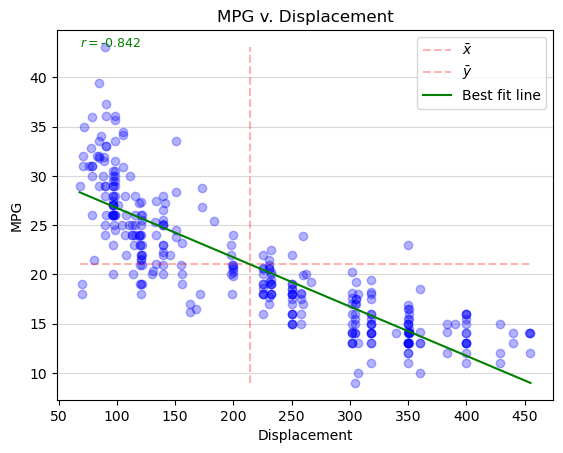

In [25]:
scatter_plot_with_best_fit(auto, 'disp', 'mpg', 'Displacement', 'MPG', 'MPG v. Displacement')

### Horsepower v. MPG

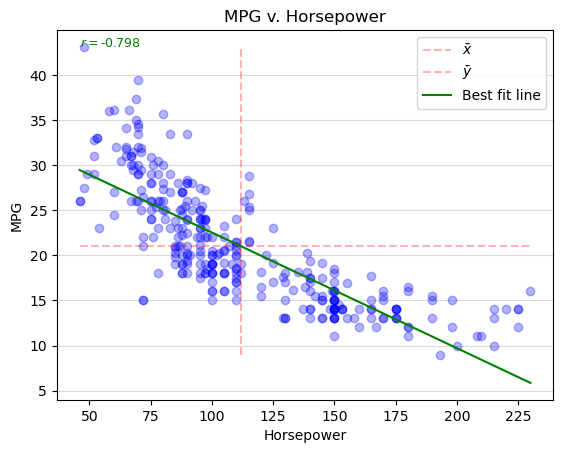

In [26]:
scatter_plot_with_best_fit(auto, 'hp', 'mpg', 'Horsepower', 'MPG', 'MPG v. Horsepower')

### Weight v. MPG

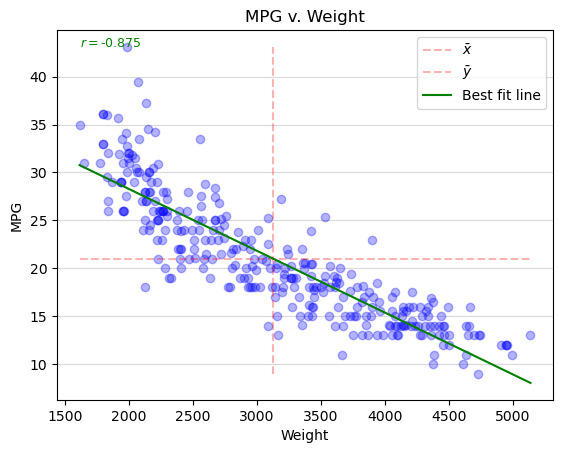

In [27]:
scatter_plot_with_best_fit(auto, 'weight', 'mpg', 'Weight', 'MPG', 'MPG v. Weight')

### Acceleration v. MPG

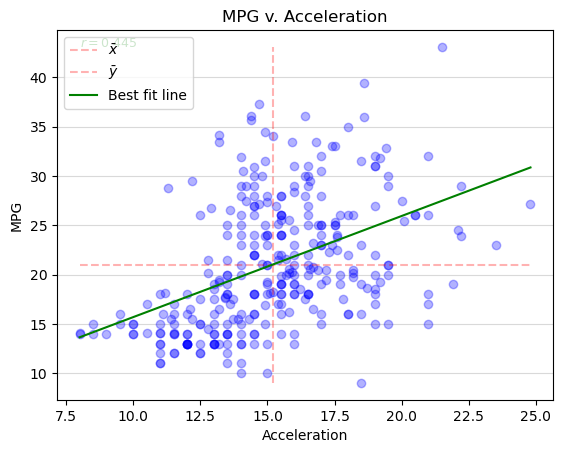

In [28]:
scatter_plot_with_best_fit(auto, 'accl', 'mpg', 'Acceleration', 'MPG', 'MPG v. Acceleration')

# 3. Basic Predictive Analytics with Linear Regression

1. Pick one of the continuous attributes (price, horespower, acceleration, weight, or displacement) that you think will best predict MPG (e.g., based on the scatter plots in Section 2).

* I choose Weight as the attribute used to predict MPG. Weight is the attribute that has the highest absolute slope, closest to 1. It means that Weight and MPG are the two attributes that have the highest (invert) correlation among the fields.

2. Get the corresponding linear regression "best fit" line (i.e., the slope and intercept values).

In [29]:
slope, intercept = linear_regression(auto, 'weight', 'mpg')
print('Slope: ', slope)
print('Intercept: ', intercept)

Slope:  -0.006442100735106266
Intercept:  41.15463538598284


3. Select 5 rows random rows from the auto dataset.

In [30]:
random_index = [random.randint(0, auto.row_count()) for i in range(5)]
random_weight = [auto[i]['weight'] for i in random_index]

print('Random-selected Weight: ', random_weight)

Random-selected Weight:  [3504, 2582, 3755, 2130, 4341]


4. Display the predicted MPG value for each of the five rows using the best-fit (linear regression) line.

In [31]:
predicted_mpg = [(slope * weight) + intercept for weight in random_weight]
print('Predicted MPG: ', predicted_mpg)

Predicted MPG:  [18.581514410170488, 24.521131287938463, 16.964547125658815, 27.432960820206496, 13.189476094886544]


5. Calculate the standard error of the predictions (versus the actual MPG values for those rows) and display the result.

In [32]:
actual_mpg = [auto[i]['mpg'] for i in random_index]
print('Actual MPG: ', actual_mpg)

num = 0
for i in range(5):
    num += ((actual_mpg[i] - predicted_mpg[i]) ** 2)
standard_error = (num / (len(actual_mpg) - 2)) ** 0.5
print('Standard Error: ', standard_error)

Actual MPG:  [18.0, 20.0, 13.0, 37.3, 15.0]
Standard Error:  6.760988094210019


# 4. Issues, Challenges, and Observations

### Issues and Challenges

* I don't have any issues completing this assignment. 

### Data Obervations

* The dataset set is conclusive, with enough data points to make a decent prediction. Based on the continuous attributes, I can see that Weight and MPG are the two attributes that have the highest (invert) correlation among the fields, as shown above with a correlation coefficient of -0.875. Compared to Weight, other continuous features, such as Acceleration, have a more significant residual (meaning the distance of data points from the best-fit line is larger). This suggests that Weight is the best attribute for predicting MPG.
* However, the standard error is still high, at 6.76. This is because the dataset is not large enough to make a more accurate prediction. Besides, we can also use other prediction techniques, such as KNN, to yield a better result. The fact that we use ordinary least squares to predict MPG does not necessarily mean it is a bad method, as the standard error is high; I think it is a good method to use for this dataset - it's just that we can make them a bit more accurate.